<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/PAPER/TP_FINAL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

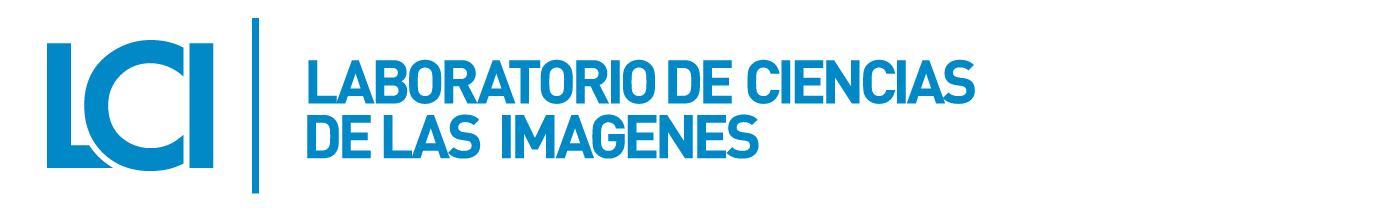


#**Universidad Nacional del Sur**
#Trabajo Final de Cátedra
##Reconocimiento de Patrones y Aprendizaje de Máquina 
##Tema: Detección de COVID-19 en imágenes de rayos X (tórax) aplicando redes neuronales densas y convolucionales

##Presentado por: Ronny Guevara
###Bahía Blanca - Argentina

## Resumen

En este trabajo se presenta la aplicación de redes neuronales densas y convolucionales como método automático para identificar casos de neumonía y COVID-19, convirtiéndose en una herramienta de asistencia médica. Para ello, se utiliza un conjunto de datos de imágenes de rayos X de tórax (anterior-posterior) realizadas como parte de la atención clínica, posterior, todas las radiografías son revisadas inicialmente por un control de calidad donde se eliminan todos los escaneos de baja calidad o ilegibles.

El conjunto de datos contiene 603 imágenes de alta resolución con 3 canales de información (RGB), las mismas están divididas en 403 imágenes para entrenamiento, 200 imágenes para prueba y 12 imágenes para validación.

## Objetivo General
Desarrollar un aplicativo que permita detectar COVID-19 en imágenes de rayos X implementando redes neuronales densas y convolucionales
## Objetivos Específicos
*   Desarrollar una red neuronal convolucional que permita predecir si el paciente contrajo virus COVID-19 o padece de neumonía
*   Entrenar al clasificador y validar su exactitud y precisión
*   Visualización de resultados

###Introducción
La enfermedad por coronavirus (COVID-19) es una gran familia de virus que suelen causar enfermedades respiratorias, desde el resfriado común hasta el síndrome respiratorio agudo severo (SRAS). 
A nivel mundial, al 14/07/2022 el total de casos confirmados por COVID-19 fue 556 897 312, incluidas 6 356 812 muertes, según la Organización Mundial de la Salud.


La epidemia del COVID-19 fue declarada por la OMS una emergencia de salud pública afectando a la población independientemente de su edad. La aparición de los síntomas de la enfermedad oscila entre 1 y 14 días, en promedio alrededor de 5 días, sin embargo, debido a que el coronavirus puede causar neumonía, y esta a su vez, se presenta con sintomatología símil como tos seca, fiebre, malestar general, dolores musculares y articulares, cansancio y dolor de cabeza, las áreas hospitalarias han visto la necesidad de evaluar la enfermedad a nivel radiológico. A fin de diagnosticar COVID-19 o neumonía.


Conozcamos algunas conceptualizaciones: 

*   Red Neuronal Convolucional: Las Redes neuronales convolucionales son  un tipo de redes neuronales artificiales  donde las neuronas corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico.  Este tipo de red es una variación de un perceptrón multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

*   COVID-19: Enfermedad respiratoria muy contagiosa causada por el virus SARS-CoV-2. Este virus se transmite de una persona a otra en las gotitas que se dispersan cuando la persona infectada tose, estornuda o habla. Los signos y síntomas más frecuentes de la COVID-19 son fiebre, tos y dificultad para respirar, fatiga, dolor de cabeza y dolor musculas. 

*   Neumonía : La neumonía es un tipo de infección respiratoria aguda que afecta a los pulmones. Éstos están formados por pequeños sacos, llamados alvéolos, que en las personas sanas se llenan de aire al respirar. Los alvéolos de los enfermos de neumonía están llenos de pus y líquido, lo que hace dolorosa la respiración y limita la absorción de oxígeno.

##Desarrollo
El desarrollo se divide en 2 etapas, la primera tiene como objetivo el desarrollo y entrenamiento de la red neuronal convolucional

###1. Desarrollo y entrenamiento de la red neuronal convolucional

In [1]:
#Lectura de librerías
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import io
import random

El conjunto de imágenes se encuentra cargado en el Drive por lo que es necesario hacer el respectivo llamado

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Asignamos la ruta de llamado para cada variable
normal_training_route = "/content/drive/MyDrive/Colab Notebooks/PROYECTO ML/Normal"
pneumonia_training_route = "/content/drive/MyDrive/Colab Notebooks/PROYECTO ML/Pneumonia"
covid_training_route = "/content/drive/MyDrive/Colab Notebooks/PROYECTO ML/COVID-19 cases"

###1.1. Creación de funciones

####1.1.1. Función image_processing
Las imágenes tienen el siguiente tratamiento: 

*   La imagen es leída mediante la librería CV2
*   Se aplica un filtro de conversión pasando del espacio RGB al espacio de escala de grises
*   Reajuste del tamaño de la imagen a 50 * 50 pixeles
*   Normalización de la imagen

In [4]:
def image_processing(image):
  tupla = []
  img_size = 600
  for img in os.listdir(image):
    img = cv2.imread(os.path.join(image, img))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_norm=img_gray.astype(np.float64)/255
    img_gray_resize = cv2.resize(img_norm,(img_size,img_size))
    tupla.append([img_gray_resize])
  return(tupla)

####1.1.2. Función image_info
Retorna información del arreglo:

*   Tipo de dato
*   Dimensiones

In [5]:
def image_info(image):
  normal = np.array(np.squeeze(image))
  print('Data type is', normal.dtype)
  print('with dimensions', normal.shape)

####1.1.3. Función etiqueta
Retorna 3 tuplas cada una con el tamaño del total de imágenes para casos normales, neumonía y COVID-19

In [6]:
def etiqueta(normal, neumonia, covid):
  normal = normal.shape
  neumonia = neumonia.shape
  covid = covid.shape
  etiqueta = np.repeat((0, normal[0]))
  etiqueta1 = np.repeat((0, neumonia[0]))
  etiqueta2 = np.repeat((0, covid[0]))

  return(etiqueta, etiqueta_neu, etiqueta_cov)

In [7]:
#Lectura de las imágenes de rayos X sin enfermedad
normal = image_processing(normal_training_route)
image_info(normal)

Data type is float64
with dimensions (234, 600, 600)


In [8]:
#Lectura de las imágenes de rayos X con neumonía
neumonia = image_processing(pneumonia_training_route)
image_info(neumonia)

Data type is float64
with dimensions (148, 600, 600)


In [9]:
#Lectura de las imágenes de rayos X con COVID-19
covid = image_processing(covid_training_route)
image_info(covid)

Data type is float64
with dimensions (221, 600, 600)


Debido a que las imágenes no se encuentran previamente etiquetadas, se crearan arreglos que contengan las etiquetas, siendo, 0 para casos normales, 1 para casos con neumonía y 2 para casos covid

In [10]:
etiquetas_normal = np.repeat(0, 234)
print(len(etiquetas_normal))
etiquetas_neumonia = np.repeat(1, 148)
print(len(etiquetas_neumonia))
etiquetas_covid = np.repeat(2, 221)
print(len(etiquetas_covid))

234
148
221


In [11]:
#Contiene el nombre para las etiquetas
class_names = ['Normal', 'Neumonia', 'Covid']

Proceso de concatenación de etiquetas e imágenes

In [12]:
rayos_x = np.squeeze(np.concatenate([normal,neumonia,covid]))
rayos_x = np.array(rayos_x)
print(rayos_x.shape)
labels = np.concatenate([etiquetas_normal,etiquetas_neumonia,etiquetas_covid])
labels = np.array(labels)
print(labels.shape)

(603, 600, 600)
(603,)


Se da lectura (aleatoria) a 36 de las 603 imágenes cada una con su respectiva etiqueta

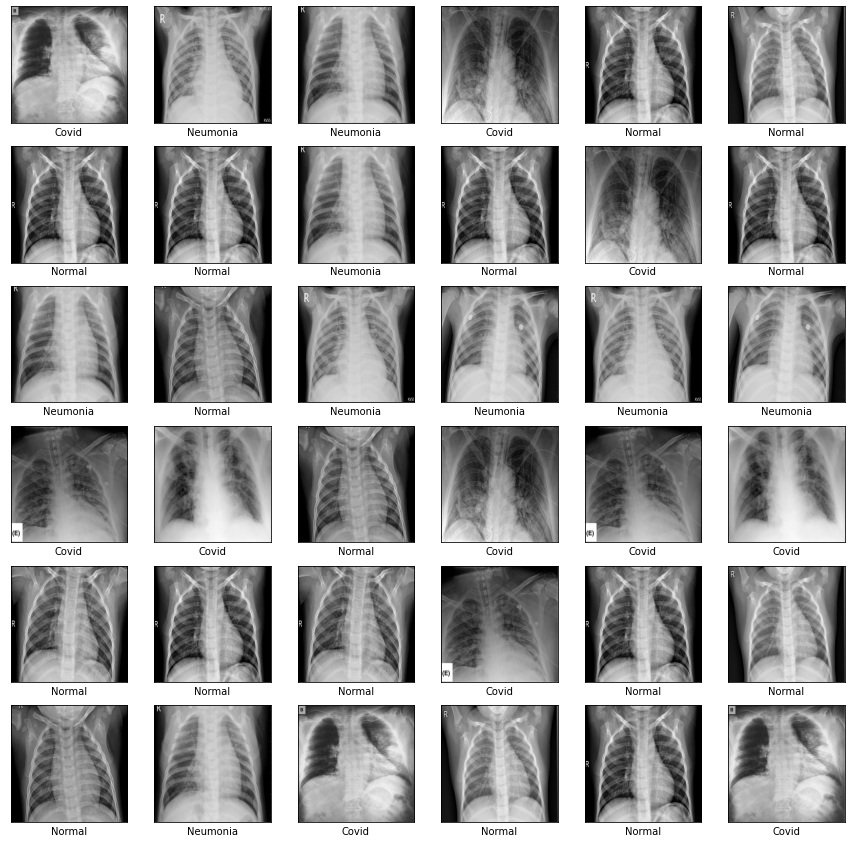

In [13]:
plt.figure(figsize=(15,15))
for i in range (36):
  j = random.randrange(0, 603, 50)
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(rayos_x[j]), cmap = 'gray')
  plt.xlabel(class_names[labels[j]])
plt.show()

###1.2. Diseño del modelo de red neuronal convolucional
Se probaron distintos modelos a diferente número de capas de convolución y capas densas, hasta obtener un modelo óptimo tanto en características computacionales como en resultados de predicción.
Descripción del modelo: 

*   1 capa de entrada
*   2 capas de convolución, kernel (3*3), activación 'relu' (rectified linear unit)
*   2 capas de agrupación máxima, forma (2*2)
*   1 capa dense oculta, activación 'relu' (rectified linear unit)
*   1 capa de activación de neuronas (Dropout)
*   1 capa de salida, activación 'softmax' (versión continua de relu y normalizada suma uno)



In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [15]:
#Porcentaje de entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rayos_x, labels, test_size=200)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 403 datos para entrenamiento y 200 datos para prueba


####1.2.1. Arquitectura de la red de Percetrones Multicapa
Las capas Dense son la capas de cálculo de que conectan cada neurona en una capa con todas las salidas de la capa anterior.

*   1 capa de entrada
*   2 capas dense ocultas, activación 'relu' (rectified linear unit)
*   1 capa de salida, activación 'softmax' (versión continua de relu y normalizada suma uno)

In [16]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(600,600,1)), 
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

historial = modelo.fit(X_train, y_train, epochs=30)
pred = modelo.predict(X_test)

Epoch 1/30
13/13 [==============================] - 3s 33ms/step - loss: 26.4914 - accuracy: 0.3772
Epoch 2/30
13/13 [==============================] - 0s 31ms/step - loss: 3.9832 - accuracy: 0.5608
Epoch 3/30
13/13 [==============================] - 0s 32ms/step - loss: 3.7232 - accuracy: 0.6228
Epoch 4/30
13/13 [==============================] - 0s 30ms/step - loss: 2.7904 - accuracy: 0.6725
Epoch 5/30
13/13 [==============================] - 0s 31ms/step - loss: 1.9555 - accuracy: 0.7419
Epoch 6/30
13/13 [==============================] - 0s 31ms/step - loss: 2.7977 - accuracy: 0.6849
Epoch 7/30
13/13 [==============================] - 0s 31ms/step - loss: 1.2844 - accuracy: 0.7717
Epoch 8/30
13/13 [==============================] - 0s 31ms/step - loss: 1.5137 - accuracy: 0.7270
Epoch 9/30
13/13 [==============================] - 0s 30ms/step - loss: 1.3002 - accuracy: 0.7519
Epoch 10/30
13/13 [==============================] - 0s 31ms/step - loss: 0.9590 - accuracy: 0.7841
Epoch 11

Impresión de la matriz de confusión, exactitud y presión

In [17]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
y_pred = np.argmax(pred, axis=1)
y_real = y_test

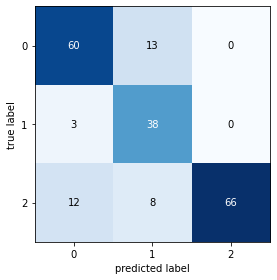

In [18]:
matc=confusion_matrix(y_real, y_pred,  labels=[0, 1, 2])
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.tight_layout()

In [19]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8000    0.8219    0.8108        73
           1     0.6441    0.9268    0.7600        41
           2     1.0000    0.7674    0.8684        86

    accuracy                         0.8200       200
   macro avg     0.8147    0.8387    0.8131       200
weighted avg     0.8540    0.8200    0.8252       200



Para el modelo denso sin capaz de convolución el test con 200 imágenes obtuvo el siguiente resultado:

*   74 casos donde el paciente no tiene neumonía ni COVID y el algoritmo predijo que es la imagen de un tórax normal, True Positive (TP)
*   32 casos donde el paciente tenía neumonía y el algoritmo predijo que es la imagen de un tórax con neumonía, True Positive (TP)
*   64 casos donde el paciente tenía COVID-19 y el algoritmo predijo que es la imagen de un tórax con COVID-19, True Positive (TP)
*   30 casos donde el algoritmo clasifico erroneamente.

Un error es de 0.1500

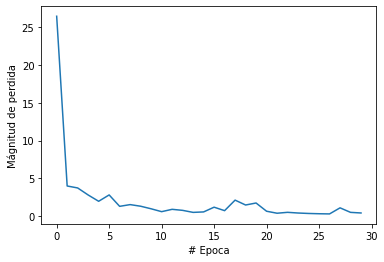

In [20]:
#Resultado de la red para cada vuelta
plt.xlabel('# Epoca')
plt.ylabel('Mágnitud de perdida')
plt.plot(historial.history['loss'])

####1.2.2. Arquitectura de la red de Percetrones Multicapa
Aumentaremos el número de capas Dense y las épocas de entrenamiento de la red

*   1 capa de entrada
*   4 capas dense ocultas, activación 'relu' (rectified linear unit)
*   1 capa de salida, activación 'softmax' (versión continua de relu y normalizada suma uno)

In [21]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(600,600,1)), 
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

historial = modelo.fit(X_train, y_train, epochs=50)
pred = modelo.predict(X_test)

Epoch 1/50
13/13 [==============================] - 1s 42ms/step - loss: 14.9276 - accuracy: 0.3722
Epoch 2/50
13/13 [==============================] - 1s 40ms/step - loss: 1.9745 - accuracy: 0.6055
Epoch 3/50
13/13 [==============================] - 1s 40ms/step - loss: 1.8654 - accuracy: 0.5856
Epoch 4/50
13/13 [==============================] - 1s 40ms/step - loss: 1.1936 - accuracy: 0.6600
Epoch 5/50
13/13 [==============================] - 1s 40ms/step - loss: 0.6903 - accuracy: 0.6923
Epoch 6/50
13/13 [==============================] - 1s 41ms/step - loss: 0.8387 - accuracy: 0.6700
Epoch 7/50
13/13 [==============================] - 1s 41ms/step - loss: 0.7905 - accuracy: 0.6625
Epoch 8/50
13/13 [==============================] - 1s 40ms/step - loss: 0.6784 - accuracy: 0.6898
Epoch 9/50
13/13 [==============================] - 1s 41ms/step - loss: 0.5051 - accuracy: 0.7370
Epoch 10/50
13/13 [==============================] - 1s 40ms/step - loss: 0.5642 - accuracy: 0.7320
Epoch 11

In [22]:
y_pred = np.argmax(pred, axis=1)
y_real = y_test

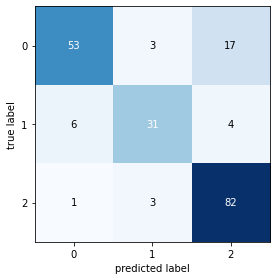

In [23]:
matc=confusion_matrix(y_real, y_pred,  labels=[0, 1, 2])
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.tight_layout()

In [24]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8833    0.7260    0.7970        73
           1     0.8378    0.7561    0.7949        41
           2     0.7961    0.9535    0.8677        86

    accuracy                         0.8300       200
   macro avg     0.8391    0.8119    0.8199       200
weighted avg     0.8365    0.8300    0.8270       200



Para el modelo denso sin capaz de convolución el test con 200 imágenes obtuvo el siguiente resultado:

*   65 casos donde el paciente no tiene neumonía ni COVID y el algoritmo predijo que es la imagen de un tórax normal, True Positive (TP)
*   19 casos donde el paciente tenía neumonía y el algoritmo predijo que es la imagen de un tórax con neumonía, True Positive (TP)
*   74 casos donde el paciente tenía COVID-19 y el algoritmo predijo que es la imagen de un tórax con COVID-19, True Positive (TP)
*   42 casos donde el algoritmo clasifico erroneamente.

Un error es de 0.2100

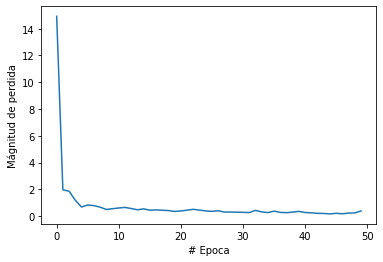

In [25]:
#Resultado de la red para cada vuelta
plt.xlabel('# Epoca')
plt.ylabel('Mágnitud de perdida')
plt.plot(historial.history['loss'])

Como resultado para esta primera etapa, vemos que el modelo denso de 2 capaz ocultas entrenado durante 30 épocas, alcanza una precisión promedio del 0.91. Si bien, aconsejan agregar más capas y más épocas de entrenamientos, los resultados demuestran lo contrario. Es importante recordar que las redes neuronales densas no tienen el mismo comportamiento para todos los dataset. Si la imagen a evaluar sufre una alteración en sus ejes, el modelo no predice de manera asertiva, por ello la importancia del desarrollo de una red neuronal convolucional. 

####1.2.3. Arquitectura de la red de neuronal convolucional

Aplicaremos la técnica de transformación de imágenes haciendo uso de la librería ImageDataGenerator

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(X_train.shape[0], 600, 600, 1)
rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    
)

datagen.fit(X_train)

In [27]:
#Crear un modelo denso, convolucional
modelo_conv = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (4,4), activation='relu', strides =(2, 2), input_shape=(600, 600, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (4,4), activation='relu', strides =(2, 2)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', strides =(2, 2)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (4,4), activation='relu', strides =(2, 2)),
    tf.keras.layers.MaxPooling2D(2,2),


    #tf.keras.layers.Conv2D(32, (4,4), activation='relu', strides =(2, 2)),
    #tf.keras.layers.MaxPooling2D(2,2),



    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(392, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation="softmax")
])

#Compilar el modelo
modelo_conv.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

historial = modelo_conv.fit(X_train, y_train, epochs=75)
pred_2=modelo_conv.predict(X_test)

Epoch 1/75
13/13 [==============================] - 15s 297ms/step - loss: 1.0991 - accuracy: 0.3623
Epoch 2/75
13/13 [==============================] - 3s 222ms/step - loss: 1.0950 - accuracy: 0.3945
Epoch 3/75
13/13 [==============================] - 3s 222ms/step - loss: 1.0908 - accuracy: 0.3672
Epoch 4/75
13/13 [==============================] - 3s 222ms/step - loss: 1.0884 - accuracy: 0.4094
Epoch 5/75
13/13 [==============================] - 3s 223ms/step - loss: 1.0552 - accuracy: 0.4988
Epoch 6/75
13/13 [==============================] - 3s 224ms/step - loss: 0.8648 - accuracy: 0.5980
Epoch 7/75
13/13 [==============================] - 3s 224ms/step - loss: 0.7808 - accuracy: 0.5831
Epoch 8/75
13/13 [==============================] - 3s 225ms/step - loss: 0.7232 - accuracy: 0.6228
Epoch 9/75
13/13 [==============================] - 3s 224ms/step - loss: 0.6539 - accuracy: 0.6427
Epoch 10/75
13/13 [==============================] - 3s 224ms/step - loss: 0.6896 - accuracy: 0.652

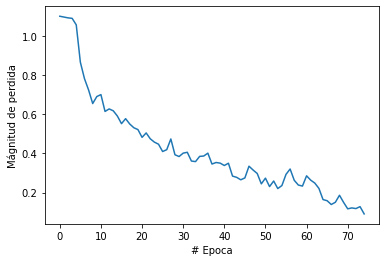

In [28]:
#Resultado de la red para cada vuelta
plt.xlabel('# Epoca')
plt.ylabel('Mágnitud de perdida')
plt.plot(historial.history['loss'])

In [29]:
y_pred2 = np.argmax(pred_2, axis=1)
y_real2 = y_test

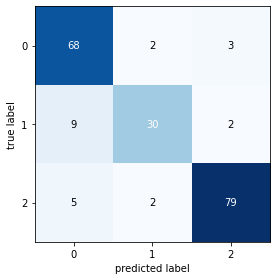

In [30]:
matc=confusion_matrix(y_real2, y_pred2)
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.tight_layout()

Para el modelo denso con capaz de convolución el test con 200 imágenes obtuvo el siguiente resultado:

Para el modelo denso sin capaz de convolución el test con 200 imágenes obtuvo el siguiente resultado:

*   75 casos donde el paciente no tiene neumonía ni COVID y el algoritmo predijo que es la imagen de un tórax normal, True Positive (TP)
*   33 casos donde el paciente tenía neumonía y el algoritmo predijo que es la imagen de un tórax con neumonía, True Positive (TP)
*   72 casos donde el paciente tenía COVID-19 y el algoritmo predijo que es la imagen de un tórax con COVID-19, True Positive (TP)
*   20 casos donde el algoritmo clasifico erroneamente.

Un error es de 0.096

In [31]:
print(metrics.classification_report(y_real2,y_pred2, digits = 4))

              precision    recall  f1-score   support

           0     0.8293    0.9315    0.8774        73
           1     0.8824    0.7317    0.8000        41
           2     0.9405    0.9186    0.9294        86

    accuracy                         0.8850       200
   macro avg     0.8840    0.8606    0.8689       200
weighted avg     0.8880    0.8850    0.8839       200



El modelo convolucional con precisión de 0.9875 fue entrenado de tal forma que si la imagen a evaluar sufrió alguna alteración en sus ejes o cambio de tamaño del tórax, este predice de manera correcta.

###5. Validación
Entrenado el modelo, lo pondremos a prueba haciendo uso de un conjunto de datos conformado por 12 imágenes de rayos X de tórax (COVID/neumonía/normal)

In [32]:
#Asignamos la ruta de llamado para cada variable
dataset_val = "/content/drive/MyDrive/Colab Notebooks/PROYECTO ML/VAL"

In [33]:
#Tratamiento de las imagenes
dataset_val = image_processing(dataset_val)
image_info(dataset_val)
dataset_val = np.squeeze(dataset_val)
dataset_val = np.array(dataset_val)

Data type is float64
with dimensions (12, 600, 600)


Hagamos una predicción
% de etiqueta [[0.8127669  0.09990917 0.08732386]]
El resultado es Normal


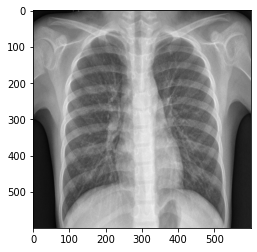

In [34]:
#@title Seleccione la imagen a evaluar { run: "auto" }
val_int = 7 #@param {type:"slider", min:1, max:12, step:1}
img = dataset_val[val_int]
plt.imshow(np.squeeze(img), cmap = 'gray')
img = (np.expand_dims(img, 0))
print('Hagamos una predicción')
resultado = modelo.predict(img)
print('% de etiqueta '+ str(resultado))
print("El resultado es "  + str(class_names[np.argmax(resultado)]))

##Análisis de resultados

*   Se desarrolla una aplicativo que satisface con el objetivo del proyecto final de cátedra, para predecir si el paciente presenta COVID-19 o neumonía se evalúa las características de la imagen de rayos X del tórax, se diseña y se entrena una red neuronal convolucional  de 8 capas  obteniendo una precisión mayor al 99% y una pérdida menor al 0.0100. El modelo se compone de:

  *   1 capa de entrada
  *   2 capas de convolución, kernel (3*3), activación 'relu' (rectified linear unit)
  *   2 capas de agrupación máxima, forma (2*2)
  *   1 capa dense oculta, activación 'relu' (rectified linear unit)
  *   1 capa de activación de neuronas (Dropout)
  *   1 capa de salida, activación 'softmax' (versión continua de relu y normalizada suma uno)


*   La red neuronal convolucional fue evaluada con diferentes cantidades de capas y distintos parámetros, hasta obtener un modelo de alta precisión y optimizado computacionalmente. El número de epocas de ejecución del algoritmo es de 75, dado que es el intervalo donde la pérdida se mantiene estable.

*   La interactividad de la aplicación permite al usuario seleccionar del dataset ‘val’, una imagen aleatoriamente para determinar si la misma pertenece a un caso de COVID-19 O neumonía.